# **Setup**

In [31]:
import pandas as pd
import numpy as np

df = pd.read_excel('cis_mar24.xlsx', sheet_name='Counts', skiprows=1)

new_columns = [
    'question_answer', 'total',
    'male','female',
    # 
    'age-16_24', 'age-25_34', 'age-35_44', 'age-45_54', 'age-55_74', 'age-75+', 'age-net_16_34', 'age-net_35_54', 'age-net_55+',
    # 
    'social_grade-ab', 'social_grade-c1', 'social_grade-c2', 'social_grade-de',
    # 
    'region-north_east', 'region-north_west', 'region-yorkshire_and_humber', 'region-east_midlands', 'region-west_midlands', 'region-east', 'region-london', 
    'region-south_east', 'region-south_west', 'region-wales', 'region-northern_ireland', 'region-net_england',
    # 
    'eth_sum-white', 'eth_sum-minority',
    # 
    'urban', 'rural',
    # 
    'marital-single', 'marital-married', 'marital-widowed_divorced_separated',
    # 
    'household-1', 'household-2', 'household-3', 'household-4+',
    # 
    'education-gcse_equ', 'education-a_level_equ', 'education-degree_master_phd', 'education-none',
    # 
    'employment-working', 'employment-not_working',
    # income
    'income-under_5000', 'income-5000_9999', 'income-10000_14999', 'income-15000_19999', 'income-20000_24999', 'income-25000_34999', 'income-35000_44999', 
    'income-45000_59999', 'income-60000_99999', 'income-100000+', 'income-prefer_not_to_say', 'income-net_under_19999', 'income-net_20000_34999', 
    'income-net_35000_59999', 'income-net_60000+',
    # 
    'parent-yes', 'parent-no',
    # 
    'living-alone', 'living-spouse_partner', 'living-friends_housemates', 'living-parents', 'living-siblings', 'living-children_over_18', 
    'living-children_under_18', 'living-other_adult_family', 'living-grandchildren', 'living-prefer_not_to_say', 'living-none_of_these',
    #
    'main_shopper-yes', 'main_shopper-no',
    # 
    'disability-yes_lot', 'disability-yes_little', 'disability-no', 'disability-net_yes',
    # 
    'mental_health-yes', 'mental_health-no',
    # 
    'food_availability-worried', 'food_availability-not_worried',
    # 
    'food_affordability-worried', 'food_affordability-not_worried',
    # 
    'skipped_cut_meals_financal-yes', 'skipped_cut_meals_financal-no',
    # 
    'know_fsa-yes', 'know_fsa-no', 'know_fsa-net_lot_little',
    # 
    'IMD-1_3', 'IMD-4_7', 'IMD-8_10',
    # 
    'ethnicity-en_wal_sct_ni_br', 'ethnicity-irish', 'ethnicity-gypsy_traveller', 'ethnicity-other_white', 'ethnicity-white_black_caribbean', 'ethnicity-white_black_african', 
    'ethnicity-white_asian', 'ethnicity-other_mixed', 'ethnicity-indian', 'ethnicity-pakistani', 'ethnicity-bangladeshi', 'ethnicity-chinese', 'ethnicity-other_asian', 'ethnicity-african',
    'ethnicity-caribbean', 'ethnicity-other_black', 'ethnicity-arab', 'ethnicity-other', 'ethnicity-prefer_not_to_say'
]

df.columns = new_columns

df.head()

,question_answer,total,male,female,age-16_24,age-25_34,age-35_44,age-45_54,age-55_74,age-75+,...,ethnicity-pakistani,ethnicity-bangladeshi,ethnicity-chinese,ethnicity-other_asian,ethnicity-african,ethnicity-caribbean,ethnicity-other_black,ethnicity-arab,ethnicity-other,ethnicity-prefer_not_to_say
0,"Q2m. To what extent, if at all, are you worrie...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unweighted base,2015,993,1022,220,312,329,307,684,163,...,12,5,11,10,37,4,4,3,11,35
2,Base: All,2015,986.75,1028.25,259.93,326.37,343.84,312.8,636.43,135.62,...,14.05,5.04,10.78,10.59,39.6,3.88,4.45,3.49,11.66,36.62
3,Very worried,122.02,64.55,57.47,24.09,33.4,29.36,14.85,18.64,1.69,...,1.05,-,-,-,15.24,-,1.15,0.99,-,5.46
4,Somewhat worried,277.44,122.59,154.85,28.87,50.55,65.58,57.49,71.7,3.25,...,3.46,-,1.9,2.97,10.39,0.88,-,1.38,3.03,7.35


# **Hypothesis Testing**

In [32]:
import re
from scipy.stats import chi2_contingency

questions = df[df['question_answer'].str.contains(r'Q\d+')]['question_answer']

pd.DataFrame(questions).set_index('question_answer')

""
question_answer
"Q2m. To what extent, if at all, are you worried about there not being enough food available for you/your household to buy in the next month?Please select one answer only"
"Q3m. To what extent, if at all, are you worried you/your household will not be able to afford food in the next month?Please select one answer only"
"Q3. In the last month, have you or anyone else in your household received a free parcel of food from a food bank or other emergency food provider?Please select one answer only"
"Q6. In the last month, did any of the following apply to you, or someone else in your household? Please tick all that apply.I, or someone in my household..."
"Q8m_1. Used cheaper cooking methods (e.g. using a hob, a microwave, air fryer or slow cooker) instead of an oven to heat or cook food"
Q8m_2. Reduced the length of time that food is cooked for
Q8m_3. Lowered the cooking temperature for food
Q8m_4. Turned off a fridge and/or freezer that contains food
Q8m_5. Changed the settings so that food in a fridge and/or freezer is being kept at a warmer temperature


In [33]:
def find_qrange(df, question, range):
    start_index = df[df['question_answer'] == question].index[0] + 1
    return df.iloc[start_index:(start_index+range)]


In [34]:
find_qrange(df, 'Q12_14. Ultra-processed, or over-processing of food', 10)

,question_answer,total,male,female,age-16_24,age-25_34,age-35_44,age-45_54,age-55_74,age-75+,...,ethnicity-pakistani,ethnicity-bangladeshi,ethnicity-chinese,ethnicity-other_asian,ethnicity-african,ethnicity-caribbean,ethnicity-other_black,ethnicity-arab,ethnicity-other,ethnicity-prefer_not_to_say
251,Unweighted base,2015,993,1022,220,312,329,307,684,163,...,12,5,11,10,37,4,4,3,11,35
252,Base: All,2015,986.75,1028.25,259.93,326.37,343.84,312.8,636.43,135.62,...,14.05,5.04,10.78,10.59,39.6,3.88,4.45,3.49,11.66,36.62
253,Highly concerned,785.69,366.45,419.23,75.48,110.08,131.39,131.77,284.99,51.98,...,8.51,2.18,3.76,5.19,15.08,2.89,2.06,2.11,1.58,15.83
254,Somewhat concerned,773.75,379.79,393.97,103.44,115.36,134.23,126.77,243.98,49.98,...,4.05,1.12,5.05,4.38,15.42,0.99,2.39,1.38,7.66,11.79
255,Not very concerned,236.12,129.99,106.13,41.26,52.92,37.87,27.67,57.3,19.09,...,-,-,0.97,1.03,0.66,-,-,-,1.43,4.24
256,Not concerned at all,76.79,50.3,26.49,10.41,16.64,13.86,12.2,18.76,4.92,...,1.5,-,1,-,-,-,-,-,0.99,1.26
257,Don't know,49.67,19.29,30.38,11.67,11.61,13.76,2.29,8.72,1.62,...,-,-,-,-,2.47,-,-,-,-,1
258,I don't know enough to comment,92.98,40.92,52.05,17.68,19.76,12.74,12.1,22.68,8.02,...,-,1.73,-,-,5.97,-,-,-,-,2.5
259,Net: Concerned,1559.44,746.24,813.2,178.92,225.44,265.62,258.53,528.97,101.96,...,12.55,3.3,8.81,9.56,30.5,3.88,4.45,3.49,9.24,27.62
260,Net: Unconcerned,312.91,180.29,132.62,51.67,69.56,51.73,39.87,76.06,24.01,...,1.5,-,1.97,1.03,0.66,-,-,-,2.42,5.5


## **Hypothesis 01:**

**UPF Concern and Region**

**H0:** There is no difference in the UPF concern across different regions.

**H1:** There is a difference in UPF Concern across different regions.

**Test:** Chi-squared test

**Justification:** The variables (UPF concern levels and regions) are categorical; Observations are independent; Expected frequencies are of sufficient quantity.

**Limitations:** Less reliable if expected frequencies are below 5; does not indicate strength/direction of association.

**Conclusion - Reject H1** \
The Chi-Square test results indicate no significant association between region and awareness of ultra-processed foods (χ² = 12.69, p = 0.314, df = 11). This suggests that awareness levels about ultra-processed foods do not significantly differ across different regions.

In [35]:
regions = df[['question_answer']+[col for col in df.columns if 'region' in col]]

regions_upf = find_qrange(regions, 'Q12_14. Ultra-processed, or over-processing of food', 10)
regions_upf

awareness = regions_upf[regions_upf['question_answer'].isin(['Net: Unconcerned', 'Net: Concerned'])]

chi2, p_value, dof, expected = chi2_contingency(awareness.T.drop('question_answer', axis=0))

# print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# analysing the results 
alpha = 0.05
if p_value < alpha:
    print("There is an association between region and concern of ultra-processed foods.")
else:
    print("There is no association between region and concern of ultra-processed foods.")

Chi-square statistic: 12.694332896710613
p-value: 0.313772197095073
Degrees of freedom: 11
There is no association between region and concern of ultra-processed foods.


<Axes: title={'center': 'Ultra-processed or over processing vs Region'}>

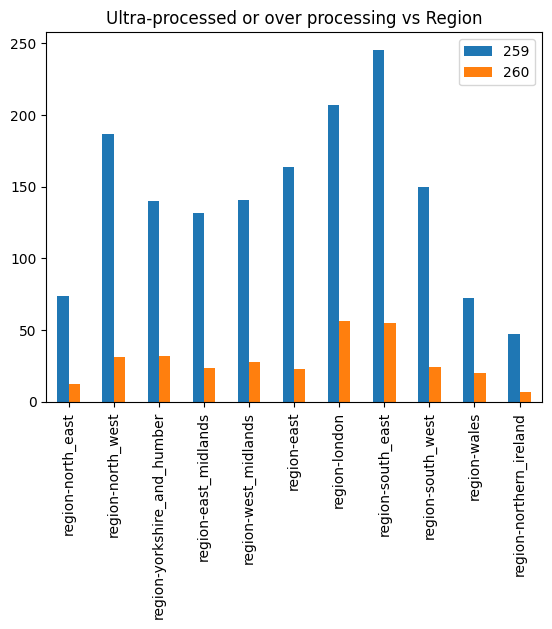

In [36]:
regions_upf.iloc[-2:,:].T.drop(['question_answer', 'region-net_england'], axis=0).plot(kind='bar', title='Ultra-processed or over processing vs Region')

## **Hypothesis 02:**

**Education Level and UPF Concern**

**H0:** Education level does not impact concern of ultra-processed foods.

**H1:** Education level has a significant impact on concern of ultra-processed foods.

**Test:** Chi-squared test

**Justification:** The variables (education levels and concern levels) are categorical; Observations are independent; Expected frequencies are of sufficient quantity.

**Limitations:** Does not indicate direction or strength of association - only demonstates association.

**Conclusion - Reject H1** \
The Chi-Square test results indicate a significant association between education level and UPF concern (χ² = 14.13, p = 0.003, df = 3). This suggests that awareness levels about ultra-processed foods significantly differ across different education levels.

In [37]:
education = df[['question_answer']+[col for col in df.columns if 'education' in col]]

education_upf = find_qrange(education, 'Q12_14. Ultra-processed, or over-processing of food', 10)
education_upf

awareness = education_upf[education_upf['question_answer'].isin(['Net: Unconcerned', 'Net: Concerned'])]

chi2, p_value, dof, expected = chi2_contingency(awareness.T.drop('question_answer', axis=0))

# print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# analysing the results 
alpha = 0.05
if p_value < alpha:
    print("There is an association between education level and concern of ultra-processed foods.")
else:
    print("There is no association between education level and concern of ultra-processed foods.")

Chi-square statistic: 14.131707026571437
p-value: 0.002731249526877923
Degrees of freedom: 3
There is an association between education level and concern of ultra-processed foods.


<Axes: title={'center': 'Ultra-processed or over-processing VS Education Level'}>

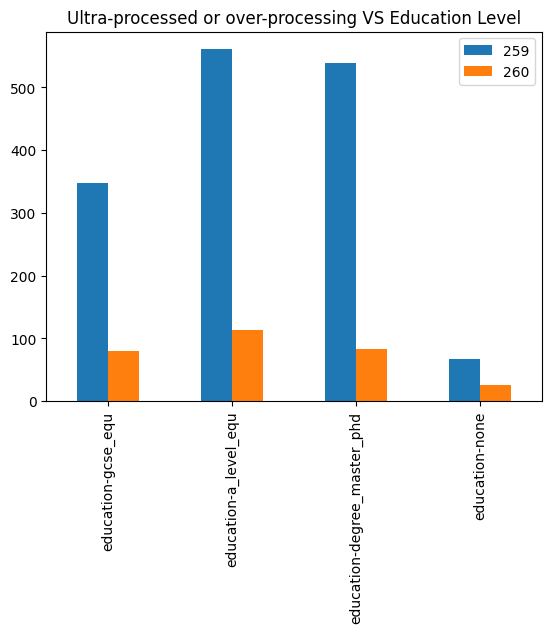

In [38]:
education_upf.iloc[-2:,:].T.drop('question_answer', axis=0).plot(kind='bar', title='Ultra-processed or over-processing VS Education Level')

## **Hypothesis 03:**

**UPF Concern and Ethnicity**

**H0:** Ethnicity does not impact concern of ultra-processed foods.

**H1:** Ethnicity has a significant impact on concern over ultra-processed foods.

**Test:** Chi-squared test

**Justification:** The variables (UPF concern levels and ethnicity) are categorical; Observations are independent; Expected frequencies are sufficient.

**Limitations:** Does not indicate direction or strength of association - only demonstates association.

**Conclusion - Reject H1** \
There is no significant association between ethnicity and concern of ultra-processed foods when considering individual ethnic groups and when comparing White and Ethnic Minority groups.

In [39]:
ethnicity = df[['question_answer']+[col for col in df.columns if 'ethnicity' in col]]

ethnicity_upf = find_qrange(ethnicity, 'Q12_14. Ultra-processed, or over-processing of food', 10).replace('-',np.nan)

awareness = ethnicity_upf[ethnicity_upf['question_answer'].isin(['Net: Unconcerned', 'Net: Concerned'])].dropna(axis=1)

chi2, p_value, dof, expected = chi2_contingency(awareness.T.drop('question_answer', axis=0))

# print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# analysing the results 
alpha = 0.05
if p_value < alpha:
    print("There is an association between ethnicity and concern of ultra-processed foods.")
else:
    print("There is no association between ethnicity and concern of ultra-processed foods.")

Chi-square statistic: 12.405265791114461
p-value: 0.4947246466082985
Degrees of freedom: 13
There is no association between ethnicity and concern of ultra-processed foods.


<Axes: title={'center': 'Ultra-processed or over-processing VS All ethnic groups'}>

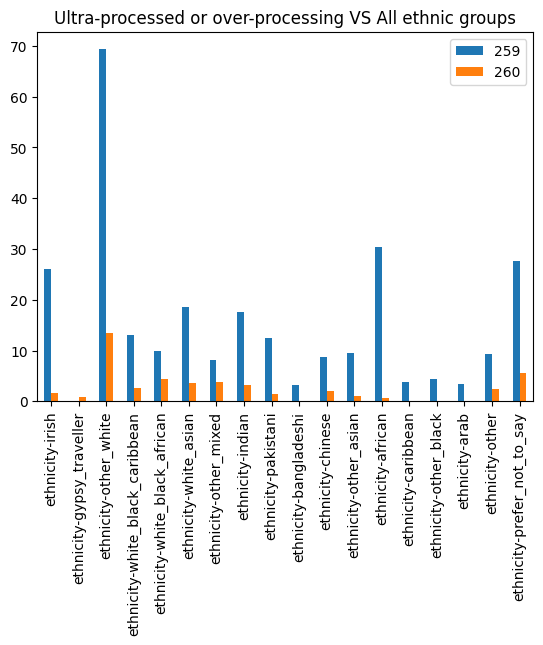

In [43]:
ethnicity_upf.iloc[-2:,:].T.drop(['question_answer', 'ethnicity-en_wal_sct_ni_br'], axis=0).plot(kind='bar', title='Ultra-processed or over-processing VS All ethnic groups')

In [45]:
ethnicity = df[['question_answer']+[col for col in df.columns if 'eth_sum' in col]]

ethnicity_upf = find_qrange(ethnicity, 'Q12_14. Ultra-processed, or over-processing of food', 10).replace('-',np.nan)

# filter for the relevant answers and drop the columns with missing values
awareness = ethnicity_upf[ethnicity_upf['question_answer'].isin(['Net: Unconcerned', 'Net: Concerned'])].dropna(axis=1)

# chi-square test
chi2, p_value, dof, expected = chi2_contingency(awareness.T.drop('question_answer', axis=0))

# print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# analysing the results 
alpha = 0.05
if p_value < alpha:
    print("There is an association between ethnicity and concern of ultra-processed foods.")
else:
    print("There is no association between ethnicity and concern of ultra-processed foods.")

Chi-square statistic: 0.7132860760817139
p-value: 0.3983550680049269
Degrees of freedom: 1
There is no association between ethnicity and concern of ultra-processed foods.


<Axes: title={'center': 'Ultra-processed or over-processing VS Ethnicity'}>

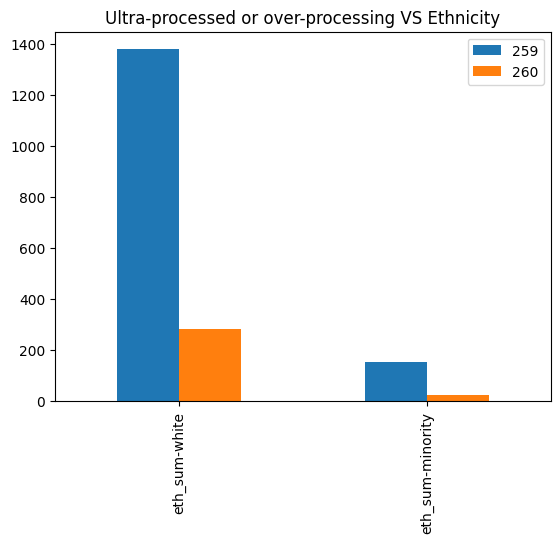

In [46]:
ethnicity_upf.iloc[-2:,:].T.drop(['question_answer'], axis=0).plot(kind='bar', title='Ultra-processed or over-processing VS Ethnicity')

## **Hypothesis 04:**

**Main Shopper and UPF Concern**

**H0:** Being the main shopper of the household does not impact concern of ultra-processed foods.

**H1:** Being the main shopper of the household has a impact on understanding of ultra-processed foods.

**Test:** Chi-squared test

**Justification:** The variables (main shopper status and concern levels) are categorical; Observations are independent; Expected frequencies are sufficient.

**Limitations:** Does not indicate how much or in what way being the main shopper affects concern levels.	

**Conclusion - Reject H1** \
The Chi-Square test results indicates significant association between being the main shopper of the household and concern over ultra-processed foods (when ignoring net concern valuess). This suggests that being the main household shopper significantly impacts concern about UPFs, which may hint at further qualitative research in consumer decisions when shopping.

In [70]:
main_shopper = df[['question_answer']+[col for col in df.columns if 'main_shopper' in col]]

main_shopper_upf = find_qrange(main_shopper, 'Q12_14. Ultra-processed, or over-processing of food', 10)

awareness = main_shopper_upf[main_shopper_upf['question_answer'].isin(['Net: Unconcerned', 'Net: Concerned'])].dropna(axis=1)

chi2, p_value, dof, expected = chi2_contingency(awareness.T.drop('question_answer', axis=0))

# print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# analysing the results 
alpha = 0.05
if p_value < alpha:
    print("There is an association between being the main shopper of the household and concern over ultra-processed foods.")
else:
    print("There is no association between being the main shopper of the household and concern over ultra-processed foods.")

Chi-square statistic: 3.757241329902418
p-value: 0.05257925906908128
Degrees of freedom: 1
There is no association between being the main shopper of the household and concern over ultra-processed foods.


<Axes: title={'center': 'Concern over ultra-processed foods by main shopper of the household'}, xlabel='Response', ylabel='Count'>

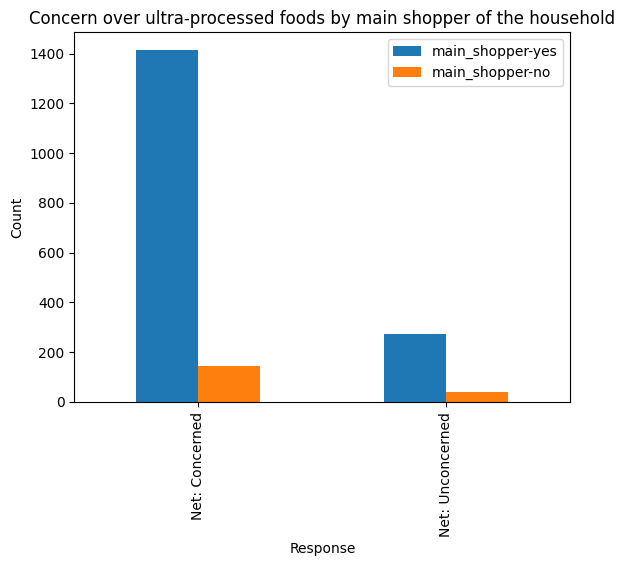

In [71]:
main_shopper_upf.iloc[-2:, :].plot(
    kind='bar', 
    x='question_answer', 
    y=['main_shopper-yes', 'main_shopper-no'],
    title='Concern over ultra-processed foods by main shopper of the household',
    xlabel='Response',
    ylabel='Count',
    )

In [77]:
# testing whether there is an association between main shopper and concern over UPFs (without testing the net values)
_, p_value, _, _ =chi2_contingency(main_shopper_upf.iloc[2:-2,:].T.drop('question_answer', axis=0))

print("p-value:", p_value)
if p_value < alpha:
    print("There is an association between being the main shopper of the household and concern over ultra-processed foods.")
else:
    print("There is no association between being the main shopper of the household and concern over ultra-processed foods.")

p-value: 0.00016507346296694187
There is an association between being the main shopper of the household and concern over ultra-processed foods.


<Axes: title={'center': 'UPF concern by household main shopper'}, xlabel='Response', ylabel='Count'>

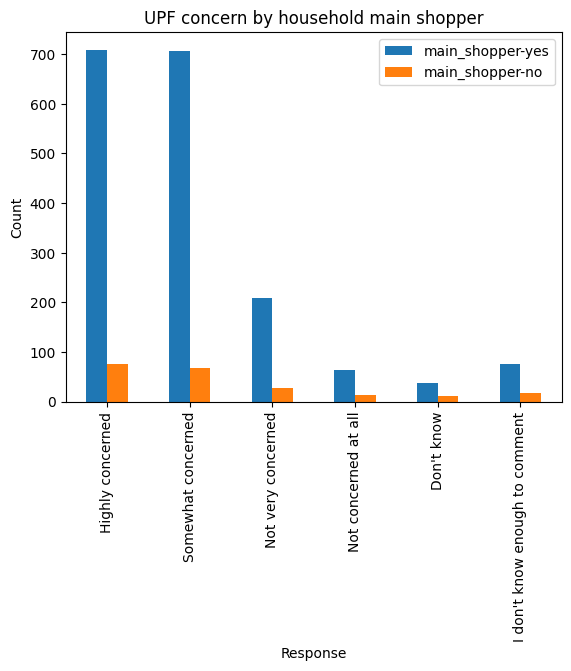

In [78]:
main_shopper_upf.iloc[2:-2, :].plot(
    kind='bar', 
    x='question_answer', 
    y=['main_shopper-yes', 'main_shopper-no'],
    title='UPF concern by household main shopper',
    xlabel='Response',
    ylabel='Count',
    )